In [1]:
import tensorflow as tf
import numpy as np

/home/ubuntu/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [5]:
X = np.float32(np.random.rand(100))
X = np.sort(X)
y = np.dot(0.200, X**2) + 0.300 + np.random.randn(100) * 0.01
X = X.reshape([-1, 1])
y = y.reshape([-1, 1])
print('x shape', X.shape)
print('y shape', y.shape)

x shape (100, 1)
y shape (100, 1)


In [8]:
b = tf.Variable(tf.zeros([1]))
W = tf.Variable(tf.random_uniform([1, 1], -1.0, 1.0))
y_pre = tf.matmul(X**2, W) + b

loss = tf.reduce_mean(tf.square(y_pre - y))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

init = tf.global_variables_initializer()
sess.run(init)

for step in range(201):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run(W), sess.run(b))

0 [[-0.30528986]] [0.54600775]
20 [[0.09967829]] [0.33574608]
40 [[0.17881884]] [0.30757466]
60 [[0.19352628]] [0.30233932]
80 [[0.19625954]] [0.30136636]
100 [[0.19676746]] [0.30118555]
120 [[0.19686186]] [0.30115196]
140 [[0.19687943]] [0.3011457]
160 [[0.19688268]] [0.30114454]
180 [[0.19688329]] [0.30114433]
200 [[0.1968833]] [0.30114433]


In [10]:
_y_pre = sess.run(y_pre)
print('y_pre:', _y_pre.reshape(-1)[:20])
print('y_true', y.reshape(-1)[:20])

y_pre: [0.3011466  0.30116013 0.3011725  0.30119306 0.30134597 0.30137488
 0.3018273  0.3018802  0.30210963 0.30211523 0.30224636 0.30251104
 0.30258492 0.302782   0.30291244 0.3033097  0.30431002 0.30457878
 0.30587393 0.30589005]
y_true [0.28868128 0.28924211 0.29234606 0.30200095 0.30633895 0.30629162
 0.30741669 0.30082186 0.29715575 0.31249286 0.30272184 0.29744265
 0.2971577  0.30515049 0.30032348 0.30517101 0.29936137 0.31332653
 0.3032727  0.28374782]


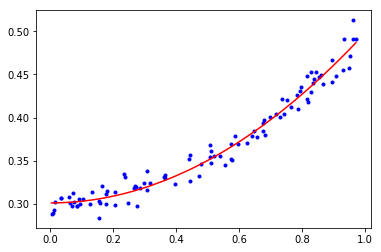

In [13]:
import matplotlib.pyplot as plt
plt.plot(X, y, 'b.')
plt.plot(X, _y_pre, 'r-')
plt.show()